In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.max_columns', 0)

In [2]:
house_df = pd.read_csv('kc_house_data_train.csv', index_col=0)

features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
          'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']

df_features = house_df[features]
target = house_df['price']

# Create a polynomial feature
# house_df['sqft_living^2'] = house_df['sqft_living']**2

# Create a interaction feature¶
# house_df['sqft_living_waterfront'] = house_df['sqft_living'] * house_df['waterfront']

In [3]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-706406.7016732403
[-3.36411400e+04 -1.68271467e+04  1.38960050e+02 -2.96224640e-01
 -3.29222815e+03  5.93587937e+05  5.94918835e+04  5.46190754e+04
  1.02886152e+05  5.54987918e+01  8.34612581e+01]
R^2:  0.6067232311969191


In [4]:
# Use SKlearn to create features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [5]:
# Fit and Assess new model

#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

#access output
# print(lm_2.intercept_)
# print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

R^2:  0.7022913208472858


In [6]:
# Fit third degree polynomial
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [7]:
#instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(df_poly3, target)

#access output
# print(lm_3.intercept_)
# print(lm_3.coef_)
print("R^2: ", lm_3.score(df_poly3, target))

R^2:  0.721314954347208


In [8]:
# Model Evaluation

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34, test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 11) Target:  (13832,)
Training set - Features:  (3458, 11) Target:  (3458,)


In [9]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-718896.917613277
[-3.19499671e+04 -1.95825800e+04  1.38321870e+02 -2.60667739e-01
 -5.27795368e+02  5.84352205e+05  5.57249717e+04  5.40794534e+04
  1.04834001e+05  5.32163021e+01  8.51055683e+01]


In [10]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.6096790456706421


In [11]:
y_train_pred = lm.predict(X_train)

In [12]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 151618.97623415757
Mean Squared Error: 54046997199.657875
Root Mean Squared Error: 232480.10065306208


In [13]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.4061378736814362
Z-Score of Root Mean Squared Error: 0.622738499478205


In [14]:
# Predicting the Test Set
y_pred = lm.predict(X_test)

In [15]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.594640913794706


In [16]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:153262.22358766012
Mean Squared Error:57933231369.5965
Root Mean Squared Error:240693.2308345968


In [17]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.4105395983379428
Root Mean Squared Error Z: 0.6447388012283355


In [18]:
# Comparing our Model's performance on training data versus test data.¶
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  232480 vs. Testing:  240693


(array([1.600e+01, 1.887e+03, 1.480e+03, 5.200e+01, 1.800e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-1062879.05500237,  -528445.47294995,     5988.10910248,
          540421.6911549 ,  1074855.27320733,  1609288.85525975,
         2143722.43731217,  2678156.0193646 ,  3212589.60141702,
         3747023.18346944,  4281456.76552187]),
 <a list of 10 Patch objects>)

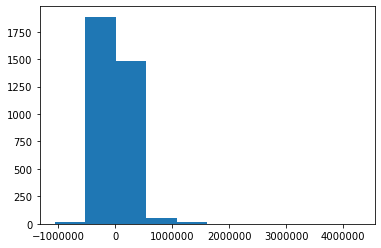

In [19]:
# Check the assumptions of linear regression
residuals = (y_test- y_pred)
plt.hist(residuals)

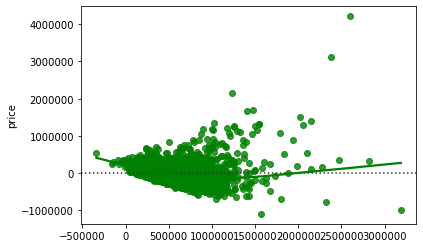

In [20]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [21]:
# Use the log of the gross
target_log = np.log(target)


#instantiate a linear regression object
log_model = LinearRegression()

#fit the linear regression to the log of the target variable
log_model.fit(X_train, np.log(y_train))

#access output
print(log_model.intercept_)
print(log_model.coef_)

10.779467731658759
[-1.27256176e-02 -1.81281780e-02  1.49692655e-04 -2.41223203e-08
  6.51157455e-02  3.29333512e-01  6.75553527e-02  9.27870600e-02
  1.99778196e-01  2.18038676e-05  1.27888787e-04]


In [22]:
y_log_train_pred = log_model.predict(X_train)
y_log_train_pred = np.exp(y_log_train_pred)

log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_pred)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_pred))

print('Mean Absolute Error:', log_train_mae )
print('Root Mean Squared Error:' , log_train_rmse)

Mean Absolute Error: 140670.7911703198
Root Mean Squared Error: 222839.78101279333


In [23]:
# see how it performs on the test data
y_log_pred = log_model.predict(X_test)
y_log_pred = np.exp(y_log_pred)

test_log_mae = metrics.mean_absolute_error(y_test, y_log_pred)
test__log_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))

print('Mean Absolute Error:' + str(test_log_mae))
print('Root Mean Squared Error:' + str(test__log_rmse))

Mean Absolute Error:146275.65331097928
Root Mean Squared Error:301813.06943887944


In [24]:
# Compare RMSE between orginal and logged target
print('Original: ', int(test_rmse), "vs. Logged: ", int(test__log_rmse))

Original:  240693 vs. Logged:  301813


(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 4.00e+00,
        2.33e+02, 2.92e+03, 2.44e+02, 3.90e+01, 1.20e+01, 1.00e+00]),
 array([-11509267.26599794, -11056437.91150135, -10603608.55700476,
        -10150779.20250816,  -9697949.84801157,  -9245120.49351498,
         -8792291.13901839,  -8339461.7845218 ,  -7886632.43002521,
         -7433803.07552862,  -6980973.72103203,  -6528144.36653544,
         -6075315.01203885,  -5622485.65754226,  -5169656.30304566,
         -4716826.94854907,  -4263997.59405248,  -3811168.23955589,
         -3358338.8850593 ,  -2905509.53056271,  -2452680.17606612,
         -1999850.82156953,  -1547021.46707294,  -1094192.11257635,
          -641362.75807976,   -188533.40358317,    264295.95091343,
           717125.30541002,   1169954.65990661

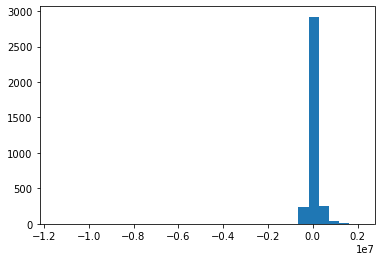

In [25]:
residuals = (y_test- y_log_pred)

plt.hist(residuals, bins=30)

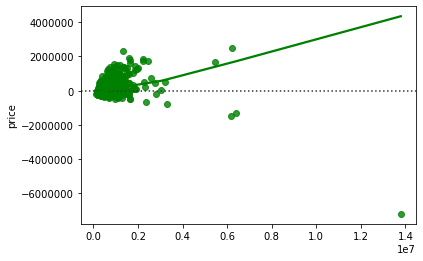

In [26]:
sns.residplot(y_log_pred, y_test, lowess=True, color="g")

In [27]:
# Evaluate Polynomial model

# Train Test Split the polynomial data

#call train_test_split on the data and capture the results
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly3, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train_poly.shape, "Target: ", y_train_poly.shape)
print("Training set - Features: ", X_test_poly.shape, "Target: ",y_test_poly.shape)


Training set - Features:  (13832, 363) Target:  (13832,)
Training set - Features:  (3458, 363) Target:  (3458,)


In [28]:
# Fit the Model

#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [29]:
# Predict on the training set
train_preds = lr_poly.predict(X_train_poly)

In [30]:
# Evaluate Training Data
train_mae_poly = metrics.mean_absolute_error(y_train_poly, train_preds)
train_mse_poly = metrics.mean_squared_error(y_train_poly, train_preds)
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))


print('Mean Absolute Error:', train_mae_poly )
print('Mean Squared Error:',  train_mse_poly)
print('Root Mean Squared Error:' , train_rmse_poly)

Mean Absolute Error: 141278.17518081138
Mean Squared Error: 43118472409.247314
Root Mean Squared Error: 207649.87938654653


In [31]:
# Predict the test set
test_preds = lr_poly.predict(X_test_poly)

In [32]:
# Evaluate the test set
test_mae_poly = metrics.mean_absolute_error(y_test_poly, test_preds)
test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test_poly, test_preds))

print('Mean Absolute Error:' + str(test_mae_poly))
# print('Mean Squared Error:' + str(metrics.mean_squared_error(____, ____)))
print('Root Mean Squared Error:' + str(test_rmse_poly))

Mean Absolute Error:150320.04040481933
Root Mean Squared Error:295529.22431887


In [33]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(____), "vs. Testing: ", int(____))

NameError: name '____' is not defined

In [ ]:
# Check residuals for normality

model = ols(formula=f, data=df).fit()
model.summary()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
